# Pymaceuticals Inc.
---

### Analysis
Suprising to see the placebo have similar effects as two other drugs (Ketapril, Naftisol) as it came to the size of the Tumor Volume based off the mean Tumor Volume and the variance in tumor volume.   No suprise the bigger the tumor was when medication started it correlated to larger variance range in the volume of the tumor.  Capomulin and Ramicane has the smallest average volume of tumors and also the smallest values of volume variance.    
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
mouse_count = len(mouse_df["Mouse ID"].value_counts())
mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Find duplicate mice by Mouse ID and Timepoint
duplicates = mouse_df[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the Mouse ID and Timepoint of the duplicates
duplicate_mice = duplicates[['Mouse ID', 'Timepoint']]
duplicate_mice

,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10
681,g989,10
815,g989,15
869,g989,15
950,g989,20
1111,g989,20


In [7]:
# Optional: Get all the data for the duplicate mouse ID.
g989_data = mouse_df.loc[mouse_df["Mouse ID"] == 'g989']
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df[mouse_df["Mouse ID"] != 'g989']

In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(clean_df["Mouse ID"].value_counts())
mouse_count2

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median_tumor = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

tumor_volume_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

tumor_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

tumor_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_max = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].max()

tumor_min = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].min()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
per_drug_regimen = pd.DataFrame(
                    {"Mean Tumor Volume": mean_tumor,
                     "Median Tumor Volume": median_tumor,
                     "Tumor Volume Variance": tumor_volume_var,
                     "Tumor Volume Std. Dev.": tumor_std,
                     "Tumor Volume Std. Err.": tumor_sem,
                     "Tumor Max Volume": tumor_max,
                     "Tumor Min Volume": tumor_min})
per_drug_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.,Tumor Max Volume,Tumor Min Volume
Drug Regimen,,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,48.158209,23.343598
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,68.923185,45.000000
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,72.226731,36.321346
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,78.567014,45.000000
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,76.668817,45.000000
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,73.212939,45.000000
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,72.455421,45.000000
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,47.622816,22.050126
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,75.123690,45.000000


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem","max","min"]}) 
summary_table

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                                    
                    max        min  
Drug Regimen                        
Capomulin     48.158209  23.343598  
Ceftamin      68.923185  45.000000  
Infubinol     72.226731  36.321346  
Ketapril      78.567014  45.000000  
Naftisol      76.668817  45.000000  
Placebo       73.212939  45.000000  
Propriva      72.455421  45.000000  
Ramicane      47.622816  22.050126  
Stelasyn      75.123690  45.000000  
Zoniferol     73.324432  45.000000

## Bar and Pie Charts

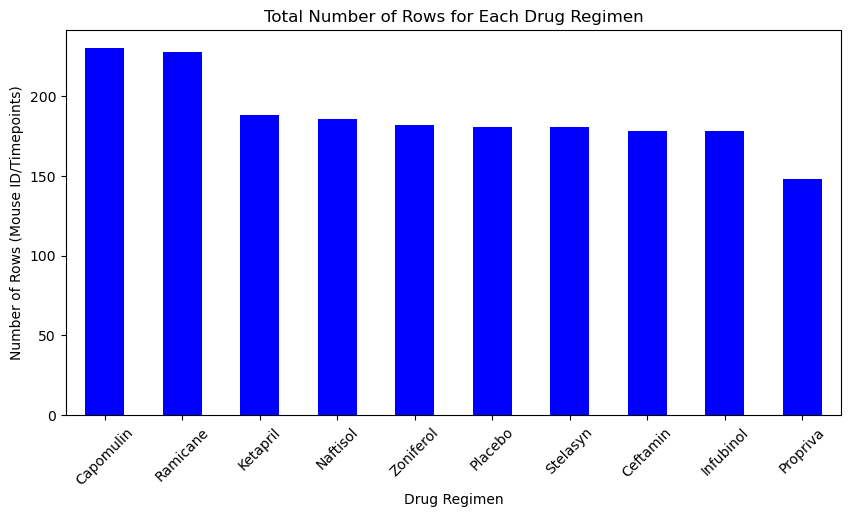

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group By 'Drug Regimen' and count the number of rows
drug_counts = clean_df.groupby('Drug Regimen').size()
drug_counts.sort_values(ascending=False, inplace=True)
# Create a bar plot
drug_counts.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()

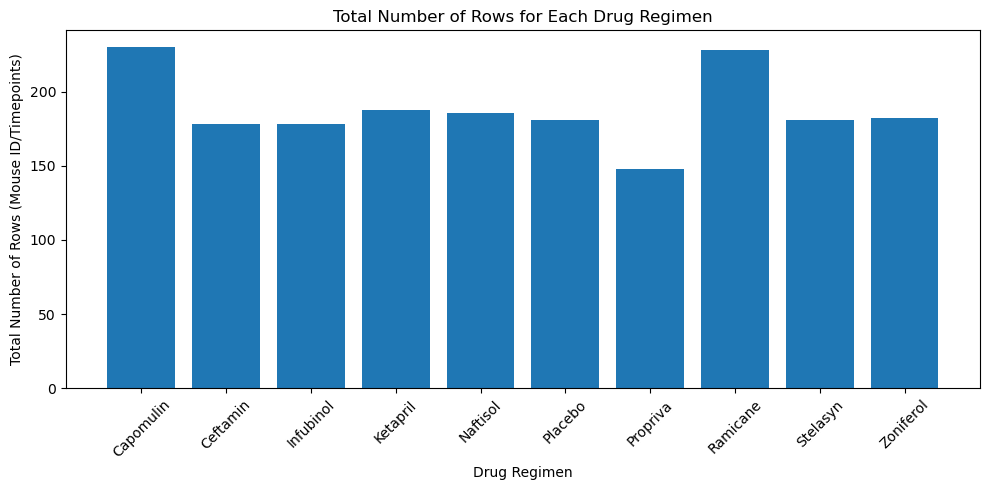

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create a bar plot using pyplot
plt.figure(figsize=(10, 5))
plt.bar(drug_counts.index, drug_counts.values)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


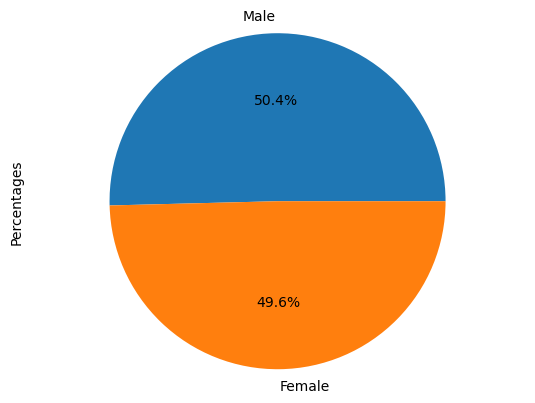

In [17]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_male = clean_df[clean_df['Sex'] == 'Male']['Mouse ID'].unique()
unique_male_count = len(unique_male)

unique_female = clean_df[clean_df['Sex'] == 'Female']['Mouse ID'].unique()
unique_female_count = len(unique_female)

total_unique_count = unique_male_count + unique_female_count
unique_male_percent = unique_male_count / total_unique_count * 100
unique_female_percent = unique_female_count / total_unique_count * 100

gender = ["Male", "Female"]
percentages = [unique_male_percent, unique_female_percent]
mfdata = pd.DataFrame(
                    {"Sex": gender,
                    "Percentages": percentages})
mfdata.plot(kind="pie", y='Percentages', labels=gender, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
plt.legend().remove()

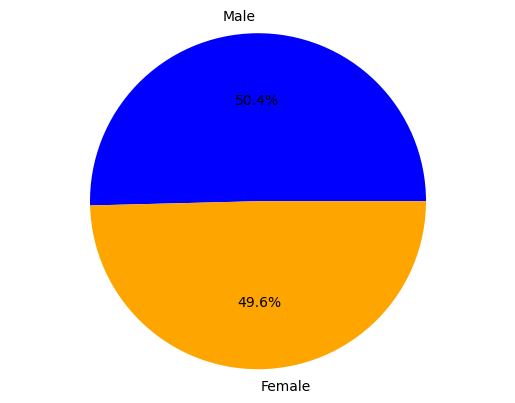

In [18]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

sex = ["Male", "Female"]
male_female_percent = [unique_male_percent, unique_female_percent]
colors = ["blue","orange"]

plt.pie(male_female_percent, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.axis("equal")
plt.show()
# Get the unique mice with their gender



# Make the pie chart

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_treatments = clean_df.loc[(clean_df['Drug Regimen'].isin(treatments)), :]

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = four_treatments.groupby(["Mouse ID"])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(four_treatments, max_time_df, on=['Mouse ID', 'Timepoint'])
final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
#  Create empty list to fill with tumor vol data (for plotting)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

#Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]
    tumor_vol_data.append(treatment_data['Tumor Volume (mm3)'])
    Q1 = treatment_data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = treatment_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3-Q1
# add subset

# determine the outliers using upper and lower bound
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 - (1.5*IQR)
    outliers = treatment_data['Tumor Volume (mm3)'][(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]

print(f"The lower quartile of Tumor Volume is: {lower_bound}")
print(f"The upper quartile of Tumor Volume is: {upper_bound}")
print(f"The interquartile range of Tumor Volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f" Outliers: {outliers.tolist()}", )
  

The lower quartile of Tumor Volume is: 25.355449580000002
The upper quartile of Tumor Volume is: 40.93320176
The interquartile range of Tumor Volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 40.93320176 could be outliers.
 Outliers: [45.0, 45.0, 45.0, 45.0, 47.7846818, 46.78453491, 48.72207785, 52.92534846, 56.05774909, 55.74282869, 57.91838132, 64.19234114, 59.85195552, 64.72983655, 68.59474498, 61.84902336, 67.52748237, 67.74866174, 64.63494887, 62.99935619, 68.92318457, 61.38666032, 64.29983003, 59.74190064, 61.43389223]


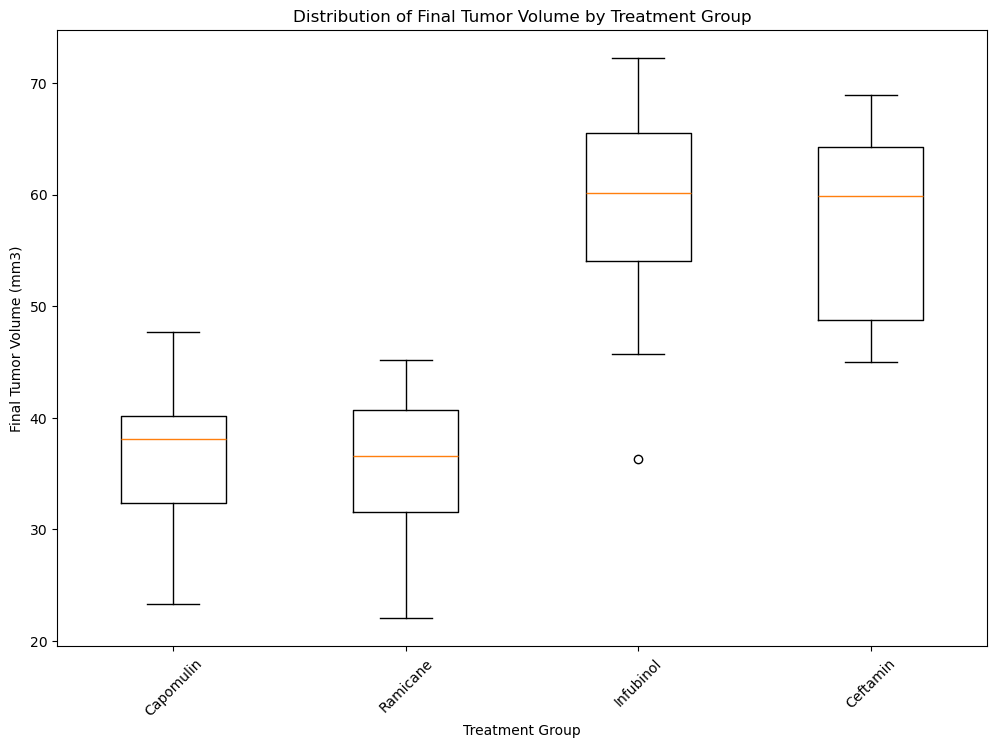

In [79]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(12,8))
plt.boxplot(tumor_vol_data, labels=treatments)

# Set the title and labels
plt.title('Distribution of Final Tumor Volume by Treatment Group')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)
# Show the plot
plt.show()

## Line and Scatter Plots

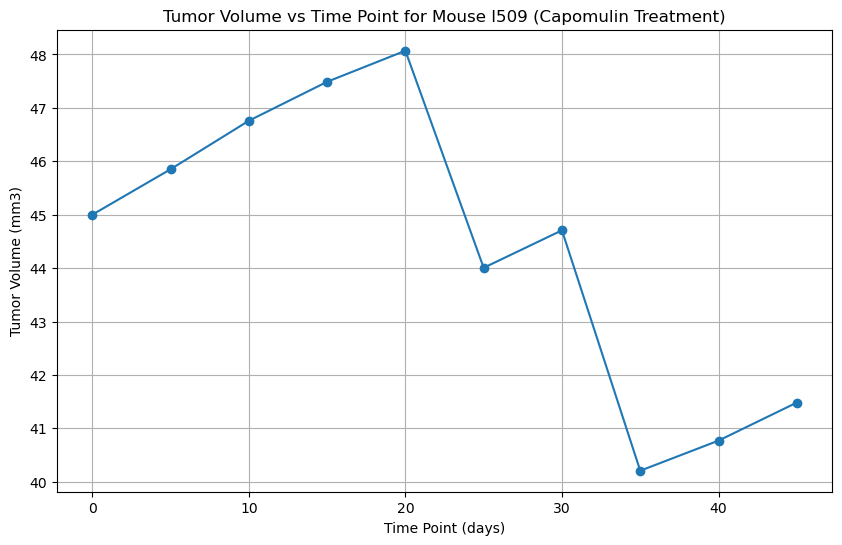

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_df[clean_df['Mouse ID'] == mouse_id]
# create the line plot
plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f'Tumor Volume vs Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

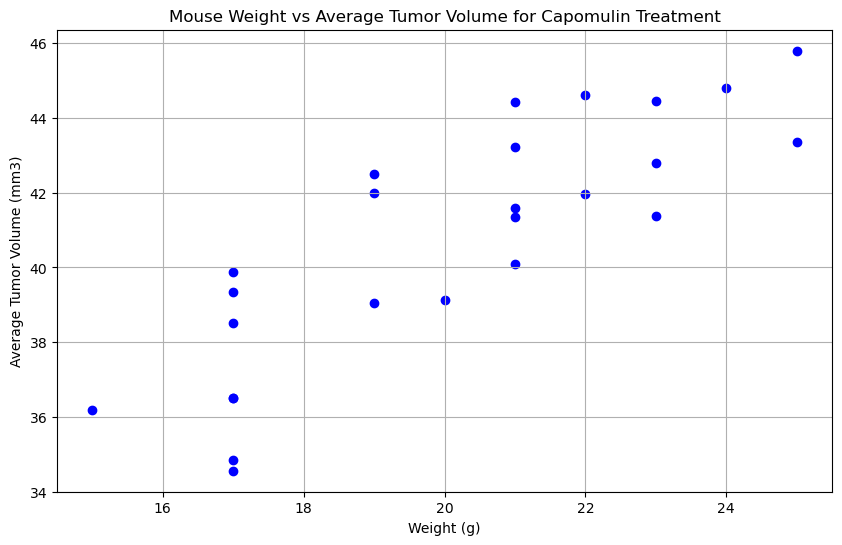

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame for mice treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with mouse weight data
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weight_data, on='Mouse ID')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()

# Show the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.5256995552077169


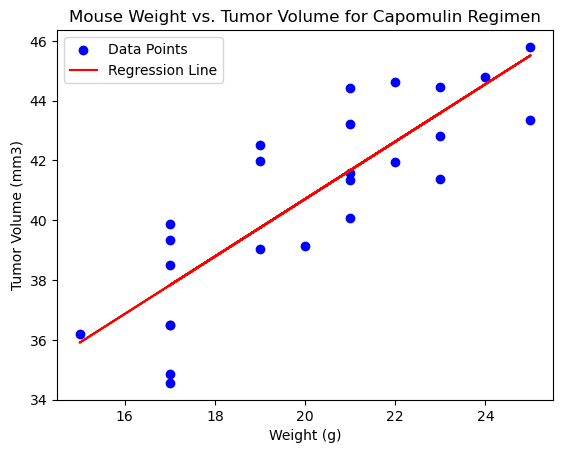

In [97]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation}')

#Perform linear regression: You can use stats.linregress from the SciPy library to perform linear regression:
slope, intercept, r_value, p_value, std_err = stats.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

#Create a scatter plot with the regression line:
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', label='Data Points')
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], color='red', label='Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume for Capomulin Regimen')
plt.legend()
plt.show()